In [41]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_city = pd.merge(ride_data, city_data, on='city', how= 'left')

# Display the data table for preview
ride_city.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

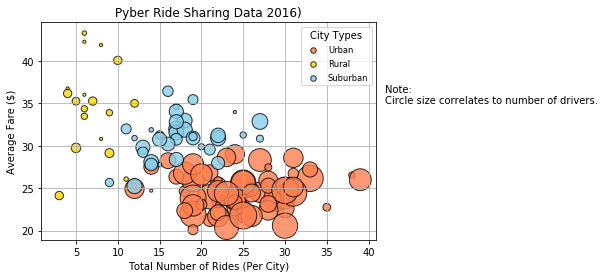

In [42]:
# Obtain the x and y coordinates for each of the three city types
urban_city = ride_city[ride_city["type"]=="Urban"]
rural_city = ride_city[ride_city["type"]=="Rural"]
suburban_city = ride_city[ride_city["type"]=="Suburban"]


urban_ride_count = urban_city.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_city.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_city.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_city.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_city.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_city.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_city.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_city.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_city.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types

plt.scatter (urban_ride_count,
          urban_average_fare,
          s=10*urban_driver_count, c="coral",
          edgecolor="black",linewidths=1,marker="o",
          alpha=0.8, label="Urban")

plt.scatter (rural_ride_count,
          rural_average_fare,
          s=10*rural_driver_count, c="gold",
          edgecolor="black",linewidths=1,marker="o",
          alpha=0.8, label="Rural")

plt.scatter (suburban_ride_count,
          suburban_average_fare,
          s=10*suburban_driver_count, c="skyblue",
          edgecolor="black",linewidths=1,marker="o",
          alpha=0.8, label="Suburban")
    
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode = "Expanded",
                loc="best", title="City Types",
                labelspacing=0.6)
lgnd.legendHandles[0]._sizes =[30]
lgnd.legendHandles[1]._sizes =[30]
lgnd.legendHandles[2]._sizes =[30]
# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:" +  "\n" +  "Circle size correlates to number of drivers.", size=10, rotation=0.,
         ha="left", va="baseline")
# Save Figure
plt.show()

## Total Fares by City Type

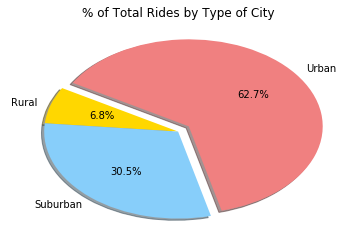

In [43]:
# Calculate Type Percents
type_grouped = ride_city.groupby('type')
total_fares_by_city_type = type_grouped['fare'].sum()
labels = ['Rural','Suburban','Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']

# Build Pie Chart
plt.title("% of Total Rides by Type of City")
plt.pie(total_fares_by_city_type, explode =[0.0,0,0.1], labels = labels, colors = colors, 
        autopct = '%1.1f%%', startangle = 150, shadow=True)
# Save Figure
plt.savefig("../Images/total_fares_by_city.png")
plt.show()

## Total Rides by City Type

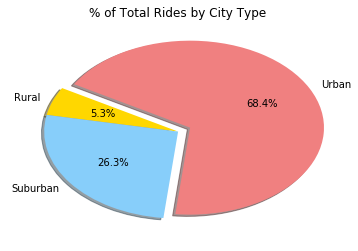

In [44]:
# Calculate Ride Percents
total_rides_by_city_type = type_grouped['ride_id'].count()
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(total_rides_by_city_type,explode =[0.0,0,0.1], labels = labels, colors = colors, 
        autopct = '%1.1f%%', startangle = 150, shadow=True)

# Save Figure
plt.savefig("../Images/total_rides_by_city.png")
plt.show()

## Total Drivers by City Type

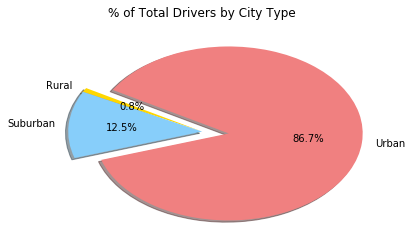

In [45]:
# Calculate Driver Percents
total_drivers_by_city_type = type_grouped['driver_count'].sum()
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0.1, 0, 0]

# Build Pie Charts
plt.title("% of Total Drivers by City Type")
plt.pie(total_drivers_by_city_type, explode =[0.0,0,0.2], labels = labels, colors = colors, 
        autopct = '%1.1f%%', startangle = 150, shadow=True)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/total_drivers_by_city.png")
plt.show()